### Case Study on Testing of Hypothesis

#### A company started to invest in digital marketing as a new way of their product promotions. For that they collected data and decided to carry out a study on it.  
#### - The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.  
#### - The company needs to check whether there is any dependency between the features “Region” and “Manager”.  

#### Help the company to carry out their study with the help of data provided.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the sample dataset "Sales_add.csv" to pandas DataFrame
data = pd.read_csv('Sales_add.csv')
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [3]:
#Understanding datatypes, labels & features in the sample dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


**Comments:  
The dataset contains 22 rows and 5 columns.  
Each row of the dataset contains information about Monthly sales attributes of the company.**

In [4]:
#Statistical summary of dataset
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


**Comments:  
From statistical data we can see that there is significant increase in average Sales revenue after investing in digital marketing.**

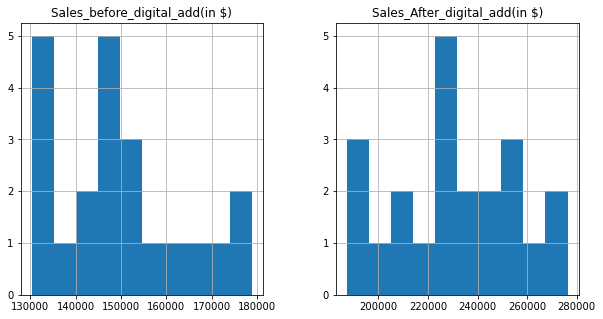

In [5]:
#plotting histogram of Sales attributes
data.hist(figsize=(10,5), bins=10);

### 1. The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

In [6]:
#assigning the two sales sample attributes to two different variables
data_salesbefore = data["Sales_before_digital_add(in $)"]
data_salesafter = data["Sales_After_digital_add(in $)"]

In [7]:
data_salesbefore.describe()

count        22.000000
mean     149239.954545
std       14844.042921
min      130263.000000
25%      138087.750000
50%      147444.000000
75%      157627.500000
max      178939.000000
Name: Sales_before_digital_add(in $), dtype: float64

In [8]:
data_salesafter.describe()

count        22.000000
mean     231123.727273
std       25556.777061
min      187305.000000
25%      214960.750000
50%      229986.500000
75%      250909.000000
max      276279.000000
Name: Sales_After_digital_add(in $), dtype: float64

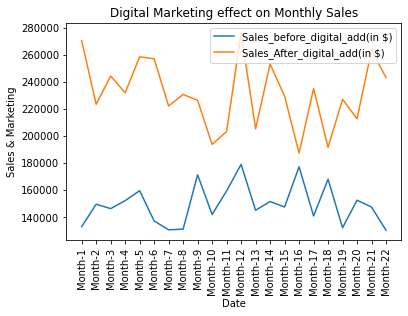

In [9]:
#line graph of Sales attributes
data_x=data.iloc[:,[3,4]]
plt.plot(data['Month'], data_x)
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Sales & Marketing')
plt.title("Digital Marketing effect on Monthly Sales")
plt.legend(data.iloc[:,[3,4]])
plt.show()

Comments:  
Clearly there is a significant increase in sales after investing in digital marketing promotions.

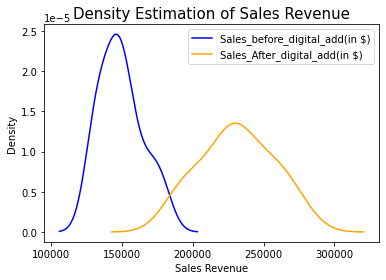

In [10]:
#kde plot
data_xy=data.iloc[:,[3,4]]
data_xy.plot.kde(color = ["blue", "orange"])
plt.title("Density Estimation of Sales Revenue", fontsize = 15)
plt.xlabel('Sales Revenue')
plt.ylabel('Density')
plt.show()

In [11]:
#Defining a null hypothesis and an alternative hypothesis.

µ1 = Sales before Digital Marketing  
µ2 = Sales after Digital Marketing

The null hypothesis assumes that digital marketing has no effect in sales.  
Null Hypothesis, H0 : µ1 = µ2  
Sales before digital marketing = Sales after digital marketing  

The alternative hypothesis assumes that digital marketing has increased the sales.  
Alternative Hypothesis, H1: µ2 > µ1  
Sales after digital marketing > Sales before digital marketing  

The purpose of the T Test is to test if the null hypothesis can be rejected or not.  

Here we can use Correlated T Test.  

Correlated (or Paired) T-Test is like a comparative analysis.

In [12]:
#Confidence Interval = 95% or 0.95

In [13]:
#Rejection region: Level of Significance or alpha value = 5% or 0.05

In [14]:
#1 tailed correlated t-test
import scipy.stats as stats

tscore, pval = stats.ttest_rel(data_salesafter, data_salesbefore, alternative='greater')

print("t Statistic: ", tscore)

print("P Value: ", pval)

t Statistic:  12.09070525287017
P Value:  3.168333502287889e-11


For two tailed tests, we reject the null hypothesis when p < alpha.  
For one tailed greater-than test, we reject the null hypothesis when p/2 < alpha and t > 0.  
For one tailed less-than test, we reject the null hypothesis when p/2 < alpha and t < 0.

Notes:-  
Significance of alpha value:  
We define a significance factor to determine whether the relation between the variables is of considerable significance. Generally a significance factor or alpha value of 0.05 is chosen. This alpha value denotes the probability of erroneously rejecting Null Hypothesis when it is true. A lower alpha value is chosen in cases where we expect more precision.  

Significance of p value:  
We depend on P-value to draw the conclusion.  
If p value < 0.05 we reject Null Hypothesis and conclude there is significant difference between factors.  
If the p-value for the test comes out to be strictly greater than the alpha value, then Null Hypothesis holds true.

In [15]:
#Degrees of freedom(DOF), Critical Value
#Degrees of freedom are the number of independent values that a statistical analysis can estimate.
prob = 0.95
dof = data_salesbefore.size+data_salesafter.size-2
print('dof=', dof)
cvalue = stats.t.ppf(prob, dof)
print('critical value= ', cvalue)

dof= 42
critical value=  1.6819523559426


Interpretation of Observed Statistic Value:-  
If Statistic >= Critical Value: significant result, reject null hypothesis (H0), sales increased.  
If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), no effect on sales.

In [16]:
# interpreting test-statistic (t-value)

print('probability=%.3f, critical value=%.3f, stat=%.3f' % (prob, cvalue, tscore))

if abs(tscore) >= cvalue:
     print('Since critical value(=%f)'%cvalue,'<','t-value(=%.2f)'%abs(tscore), ' We reject the null hypothesis')
else:
     print('Since critical value(=%f)'%cvalue,'>','t-value(=%.2f)'%abs(tscore),' We do not reject the null hypothesis')

probability=0.950, critical value=1.682, stat=12.091
Since critical value(=1.681952) < t-value(=12.09)  We reject the null hypothesis


In [17]:
# for alpha value = 5% or 0.05
if pval < 0.05:    
   print("Digital marketing has increased the sales")
else:
  print("Digital marketing has no effect in the sales")

Digital marketing has increased the sales


**Conclusion:  
Null hypothesis can be rejected since P-value of the test is less than alpha value.  
P-value lies within the Rejection Region or Level of Significance.  
Alternative hypothesis is accepted.  
So it can be concluded that promotions by Digital marketing has increased the sales.**

### 2. The company needs to check whether there is any dependency between the features “Region” and “Manager”.

In [18]:
#calculating the average regional sales of each manager
dataRM = data[['Manager', 'Region', 'Month', "Sales_before_digital_add(in $)",
               "Sales_After_digital_add(in $)"]].groupby(['Manager', 'Region']).agg(['count', 'sum', 'mean'])
dataRM

Sales_before_digital_add(in $)                         \
                                                count     sum           mean   
Manager     Region                                                             
Manager - A Region - A                              4  594514  148628.500000   
            Region - B                              4  570900  142725.000000   
            Region - C                              1  147463  147463.000000   
Manager - B Region - A                              3  466851  155617.000000   
            Region - B                              1  152167  152167.000000   
            Region - C                              3  469477  156492.333333   
Manager - C Region - A                              3  420684  140228.000000   
            Region - B                              2  330598  165299.000000   
            Region - C                              1  130625  130625.000000   

                       Sales_After_digital_add(in $)                          
                                               count      sum           mean  
Manager     Region                                                            
Manager - A Region - A                             4  1030437  257609.250000  
            Region - B                             4   939851  234962.750000  
            Region - C                             1   229336  229336.000000  
Manager - B Region - A                             3   656832  218944.000000  
            Region - B                             1   231808  231808.000000  
            Region - C                             3   643654  214551.333333  
Manager - C Region - A                             3   701262  233754.000000  
            Region - B                             2   429436  214718.000000  
            Region - C                             1   222106  222106.000000

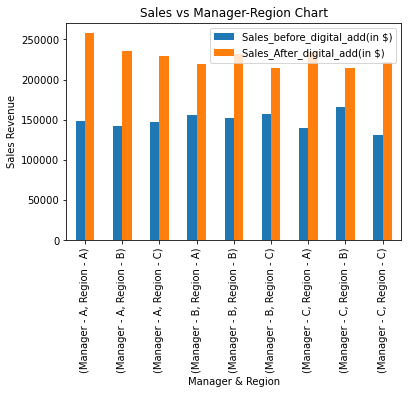

In [19]:
#plotting average regional sales
dataRM1 = data.groupby(['Manager', 'Region']).mean()
dataRM1.plot(kind='bar')
plt.xlabel("Manager & Region")
plt.ylabel("Sales Revenue")
plt.title("Sales vs Manager-Region Chart")
plt.xticks(rotation=90)
plt.show()

Comments:  
Considering average regional sales, it can be observed from chart that there are some dependancies between region & manager.  
It is just an inferential analysis.  
As categorical variables are involved it can be accurately interpreted only after comprehensive parametric statistical testing.  

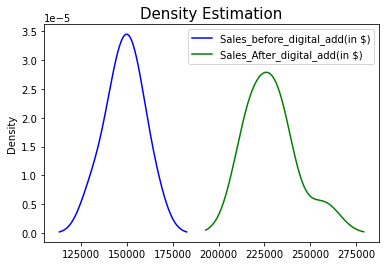

In [20]:
#kde plot
dataRM1.plot.kde(color = ["blue", "green"])
plt.title("Density Estimation", fontsize = 15)
plt.show()

In [21]:
#Defining a null hypothesis and an alternative hypothesis.

Null Hypothesis, H0 :  
There is no dependency between the features “Region” and “Manager"  

Alternate Hypothesis, H1 :  
There is significant dependency between the features “Region” and “Manager"

Here, Region and Manager are Categorical variables. Therefore to test dependancy we use Chi Square Test.  

**Pearson's Chi-Square Test of Independence is used to test if two categorical variables might be correlated or not.**

Notes:-  
Contingency Table :  
A Contingency table (also called crosstab) is used to summarise the relationship between several categorical variables.  
Pairs of categorical variables can be summarized using a contingency table. The chi-squared test can compare an observed contingency table to an expected table and determine if the categorical variables are independent.

Using chi-square value:  
If our calculated value of chi-square is less or equal to the tabular(also called critical) value of chi-square, then Null Hypothesis holds true.

Interpretation of Observed Statistic Value:-  
If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.  
If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.

Interpretation of p-value:-  
If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.  
If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.

In [22]:
#Confidence Interval = 95% or 0.95

In [23]:
#Rejection region: Level of Significance or alpha value = 5% or 0.05

In [24]:
# chi-squared test of independence with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# creating cross tab of two features; contingency table
contigencytable = pd.crosstab(data['Region'], data['Manager'])
print(contigencytable)

# execute Chi-square test of independence
stat, p, dof, expected = chi2_contingency(contigencytable)
print('dof=%d' % dof)
print('\n')
print('array', expected)

#The information is returned within a tuple where the first value is the Chi-square test static 
#The second value is the p-value, and the third number is the degrees of freedom 
#An array is also returned which contains the expected cell counts
print('\n')

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (Reject Null Hypothesis)')
else:
    print('Independent (Fail to reject Null Hypothesis)')
print('\n')

# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (Reject Null Hypothesis)')
else:
    print('Independent (Fail to reject Null Hypothesis)')

Manager     Manager - A  Manager - B  Manager - C
Region                                           
Region - A            4            3            3
Region - B            4            1            2
Region - C            1            3            1
dof=4


array [[4.09090909 3.18181818 2.72727273]
 [2.86363636 2.22727273 1.90909091]
 [2.04545455 1.59090909 1.36363636]]


probability=0.950, critical=9.488, stat=3.051
Independent (Fail to reject Null Hypothesis)


significance=0.050, p=0.549
Independent (Fail to reject Null Hypothesis)


In [25]:
# for alpha value = 5% or 0.05
if p <= 0.05:    
   print("There is significant dependency between the features Region and Manager")
else:
  print("There is no dependency between the features Region and Manager")

There is no dependency between the features Region and Manager


**Conclusion:  
Since p-value(0.549) is higher than alpha value (0.05), we conclude that we do not reject Null hypothesis.  
That means there is no dependency between the features Region and Manager.**

**Insights:  
From the correlation t-test we concluded that sales has significantly increased after investing in digital marketing promotions.  
From kde plot, it can be inferred that sales after digital marketing is evenly distributed than sales before digital marketing.**  

**While considering average regional sales, it was observed from chart that there are some dependencies between region & manager; which is only an inferential analysis. After implementing comprehensive statistical testing methods on the categorical test samples it is concluded that Manager's influence on regional sales is negligible.**  

**From Pearson's Chi-Square Test of Independence, it can be concluded that there is no dependency between the features Region and Manager.**